In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/vgsales.csv', index_col='Rank')
data.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [3]:
data = data.dropna()
data.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

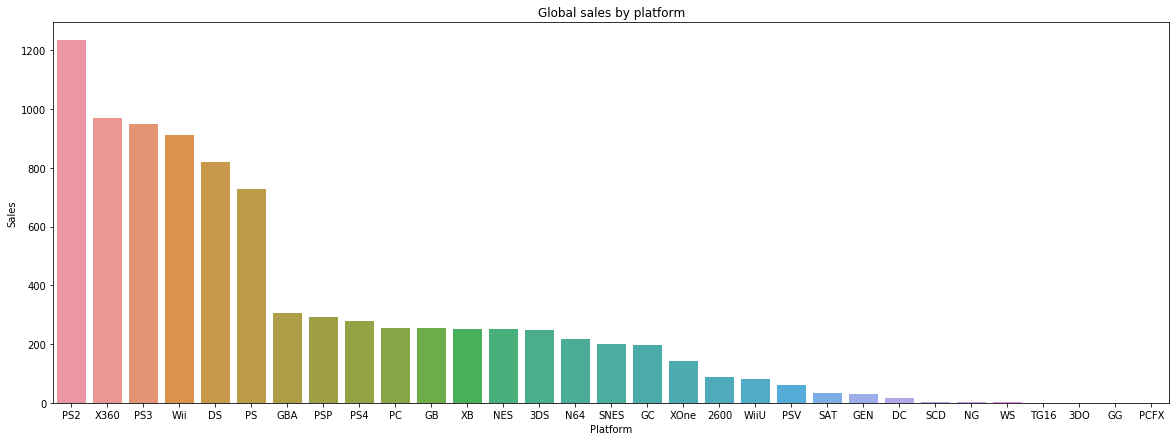

In [4]:
platforms = sorted(list(dict.fromkeys([platform for platform in data['Platform']])))
total_sales = [round(data.query(f"Platform == '{platform}'")['Global_Sales'].sum(), 2) for platform in platforms]

plt.figure(figsize=(20, 7))
plt.title('Global sales by platform')
plt.ylabel('Sales')
plt.xlabel('Platform')
platform_sales = pd.DataFrame({'Platform': platforms, 'Sales': total_sales}).set_index('Platform').sort_values(by=['Sales'], ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales['Sales'])

In [5]:
platform_genre_sales = pd.DataFrame({'Platform': platforms}).set_index('Platform')
platform_genre_count = data.groupby(['Platform', 'Genre']).size().reset_index(name="Count")
genres = sorted(list(dict.fromkeys([genre for genre in data['Genre']])))
genre_sales = [[round(data.query(f"Genre == '{genre}' and Platform == '{platform}'")['Global_Sales'].sum(), 2) for platform in platforms] for genre in genres]

genre_index = 0
for genre in genres:
    platform_genre_sales[genre+'_Sales'] = genre_sales[genre_index]
    genre_index += 1

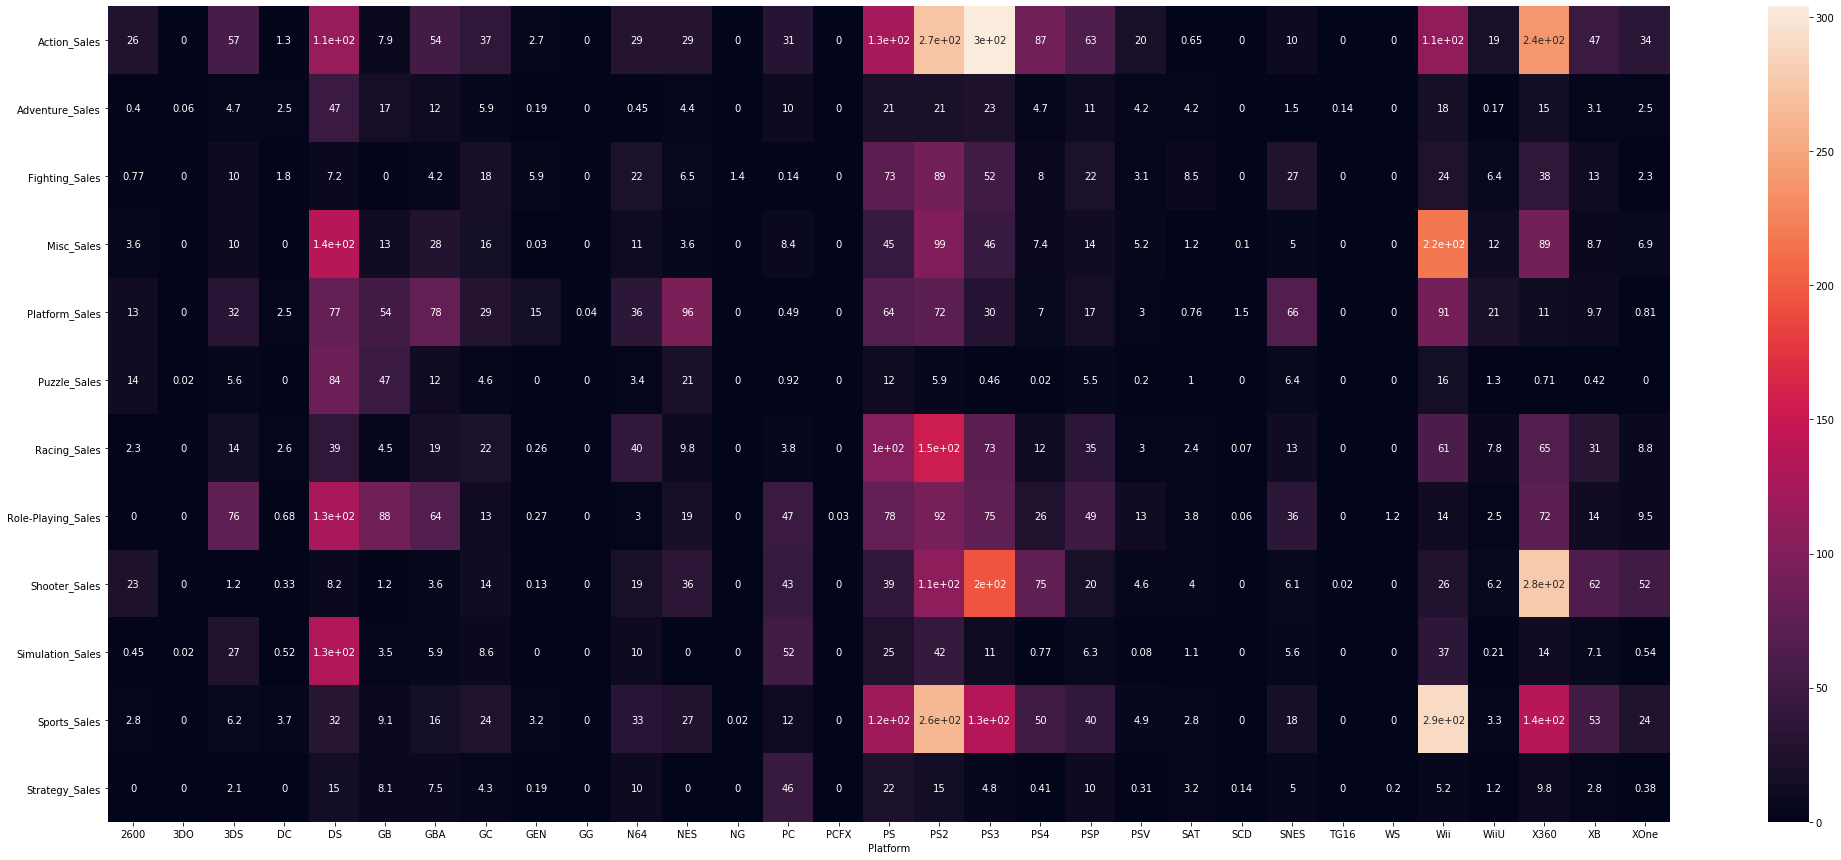

In [6]:
plt.figure(figsize=(35, 15))
sns.heatmap(data=platform_genre_sales.transpose(), annot=True)

# Biggest Video Game Markets (as of ~2016):
1. Action games on PS3
2. Sports games on Wii
3. Shooter games on Xbox 360
4. Action games on PS2
5. Sports games on PS2

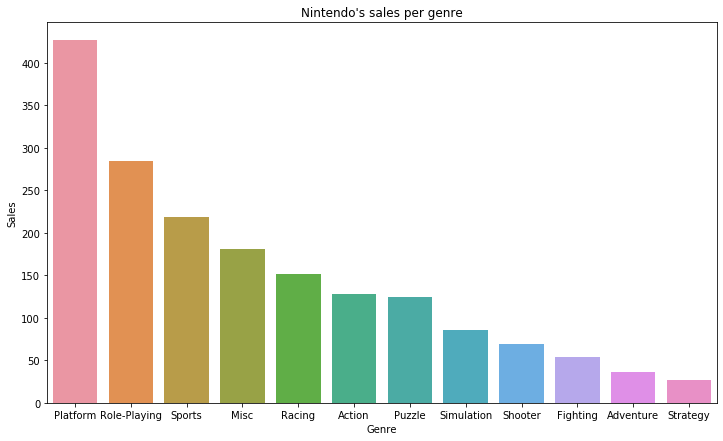

In [9]:
publishers = sorted(list(dict.fromkeys([publisher for publisher in data['Publisher']])))
# print(publishers)

publisher = 'Nintendo'

publisher_genre_sales = [round(data.query(f"Genre == '{genre}' and Publisher == '{publisher}'")['Global_Sales'].sum(), 2) for genre in genres]
publisher_sales = pd.DataFrame({'Genre': genres, 'Sales': publisher_genre_sales}).set_index('Genre').sort_values(by=['Sales'], ascending=False)

plt.figure(figsize=(12, 7))
plt.title(f"{publisher}'s sales per genre")
sns.barplot(x=publisher_sales.index, y=publisher_sales['Sales'])

# Highest Selling Genres for Companies (as of ~2016):
**Nintendo:**
1. Platform
2. Role-Playing
3. Sports

**Activision**
1. Shooter
2. Action

**Sony Computer Entertainment**
1. Racing
2. Platform
3. Action

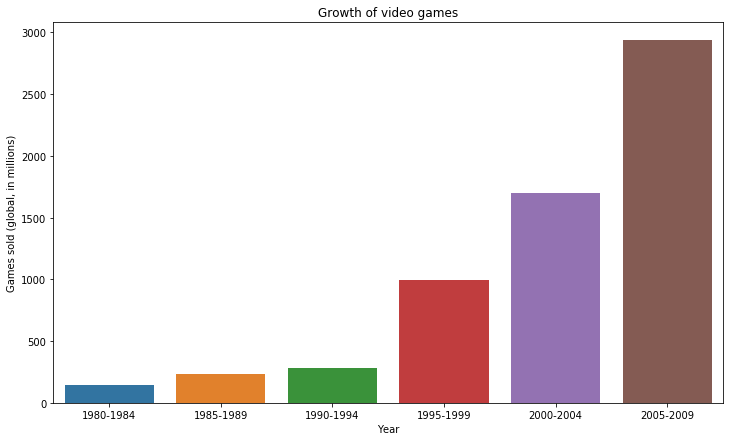

In [8]:
years = [int(year) for year in sorted(list(dict.fromkeys([year for year in data['Year']])))]

year_spans = [f"{x}-{x+4}" for x in range(1980, 2006, 5)]
sales_by_year = [round(data.query(f"Year > {x-1} and Year <= {x+4}")['Global_Sales'].sum(), 2) for x in range(1980, 2006, 5)]

plt.figure(figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Games sold (global, in millions)')
plt.title('Growth of video games')
sns.barplot(x=year_spans, y=sales_by_year)